# Yala bismillah

In [1]:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("fetal_health.csv")
data


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [3]:
data.duplicated().sum()

13

In [4]:
data.drop_duplicates(inplace=True)

# Check missing value

In [5]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# EDA

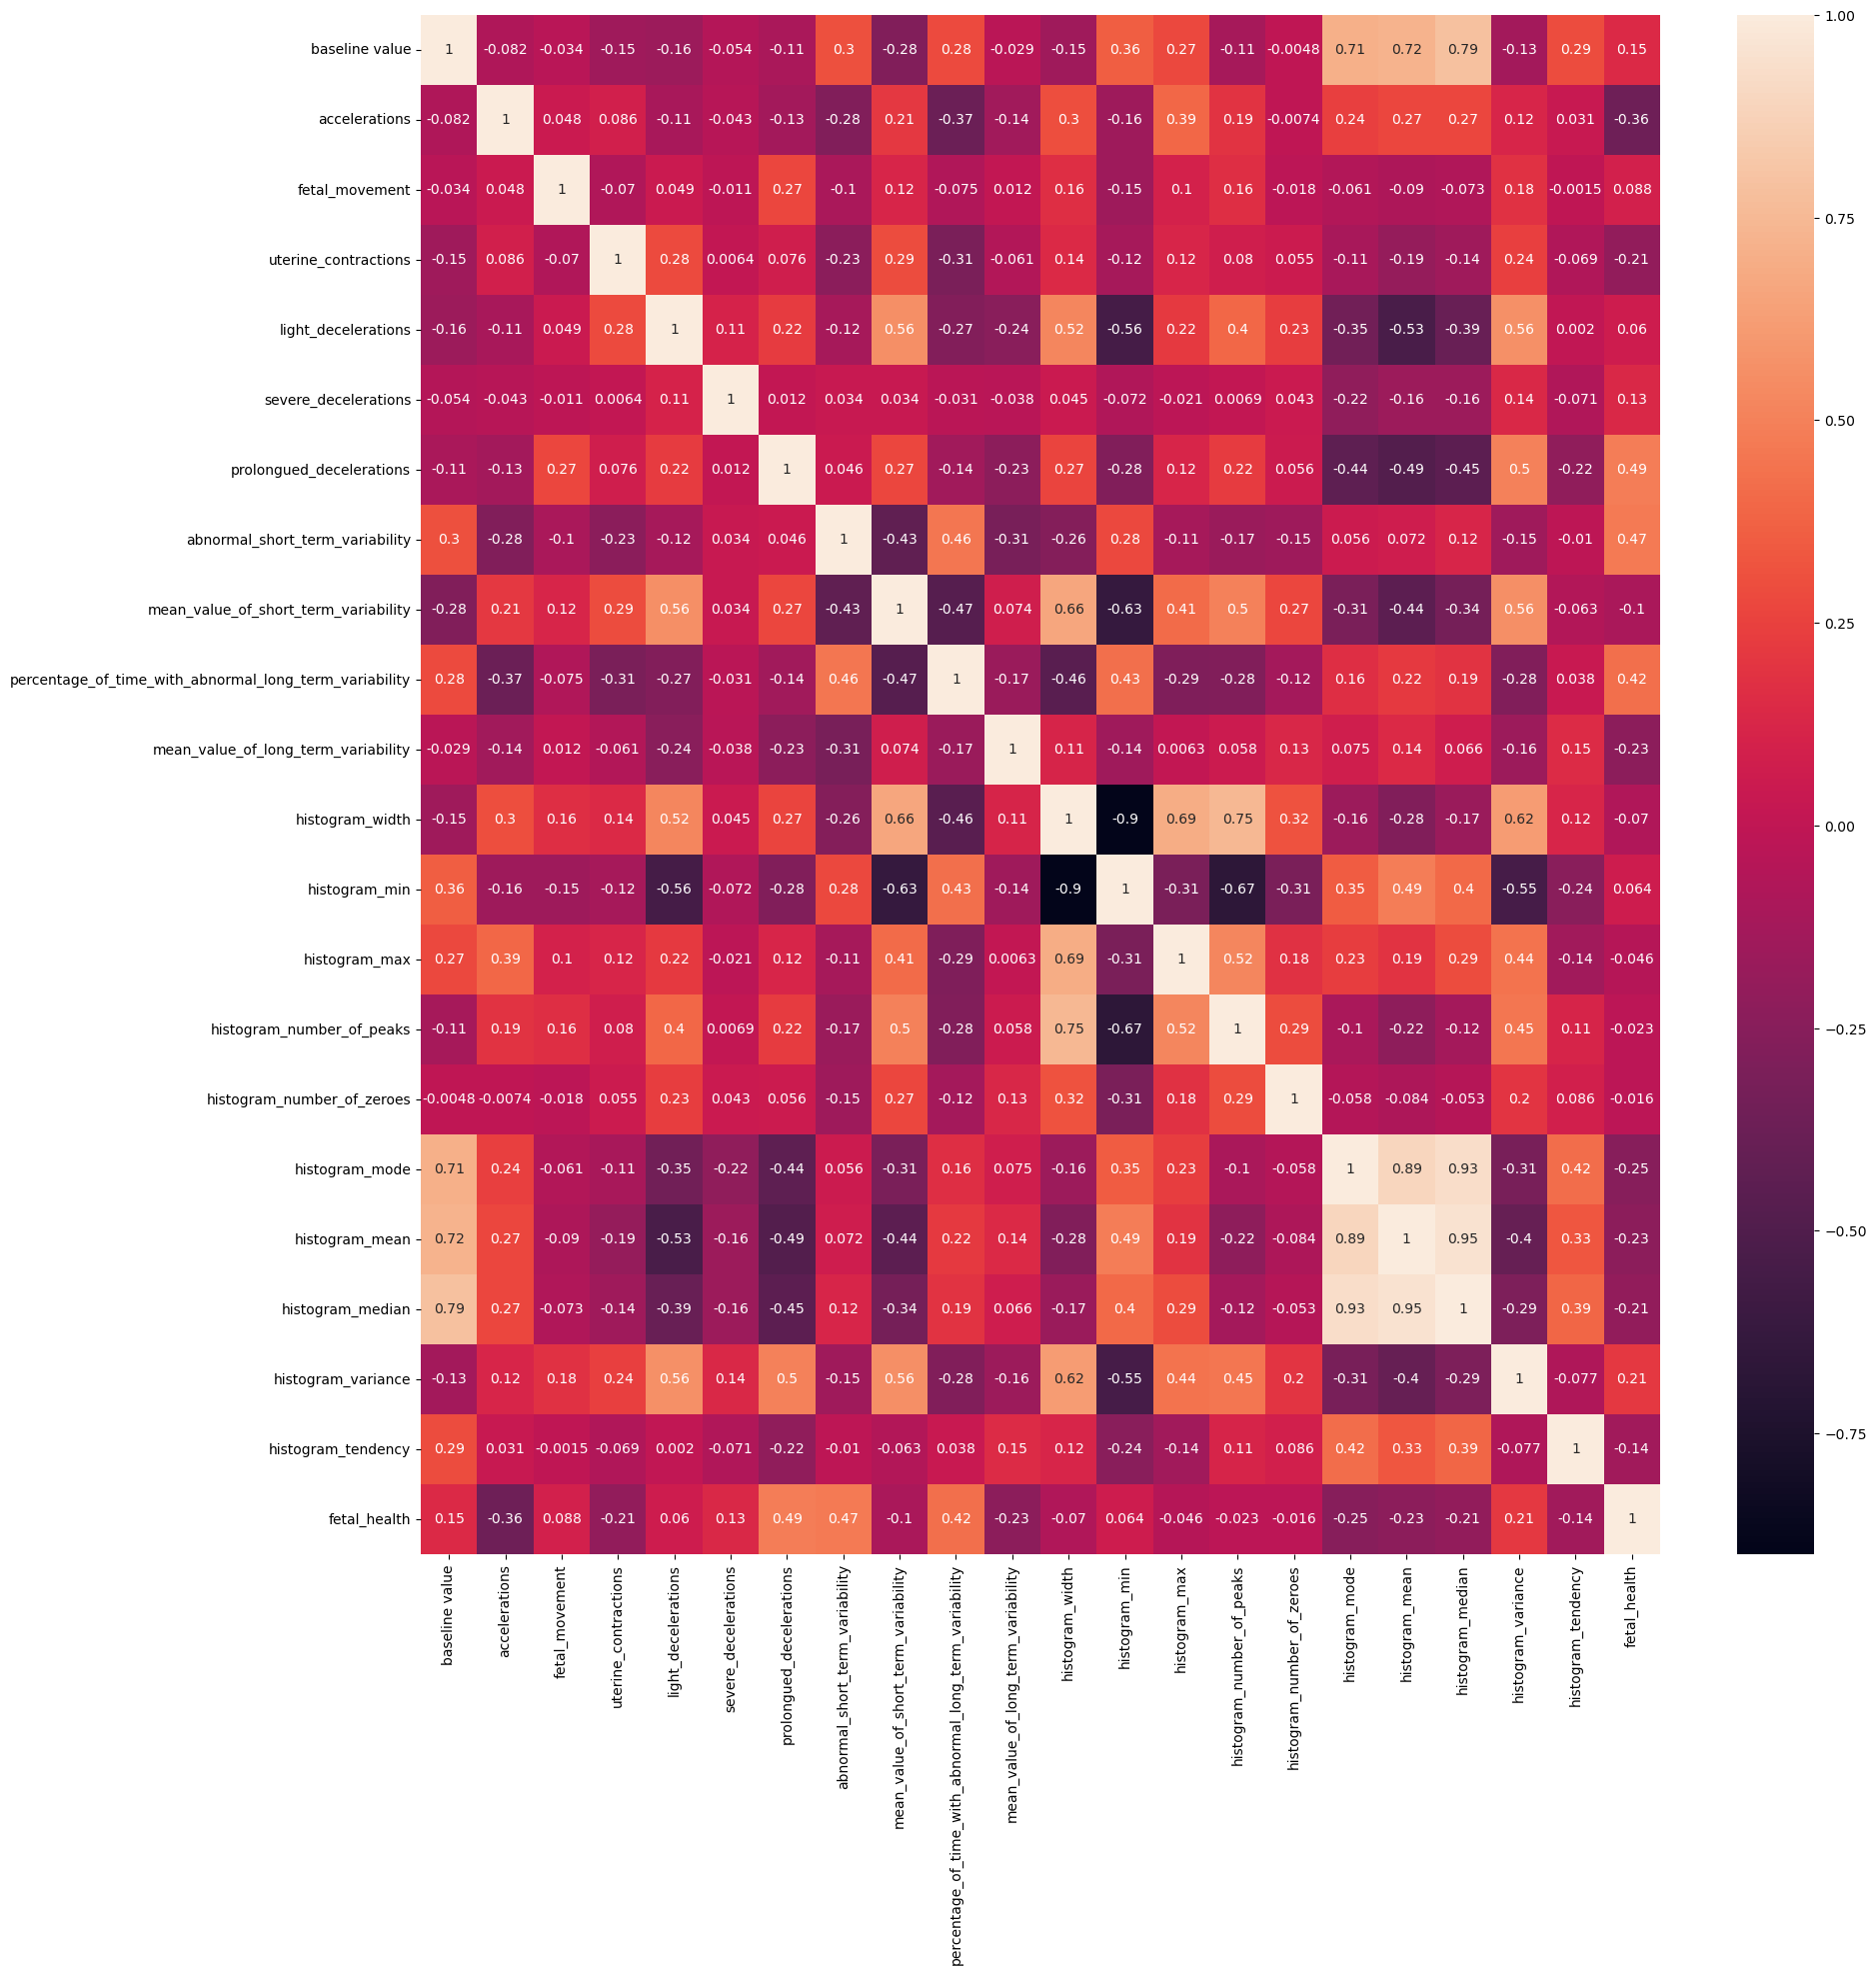

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [7]:
numerical_cols = data.select_dtypes(exclude = 'O').columns.tolist()
numerical_cols



['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

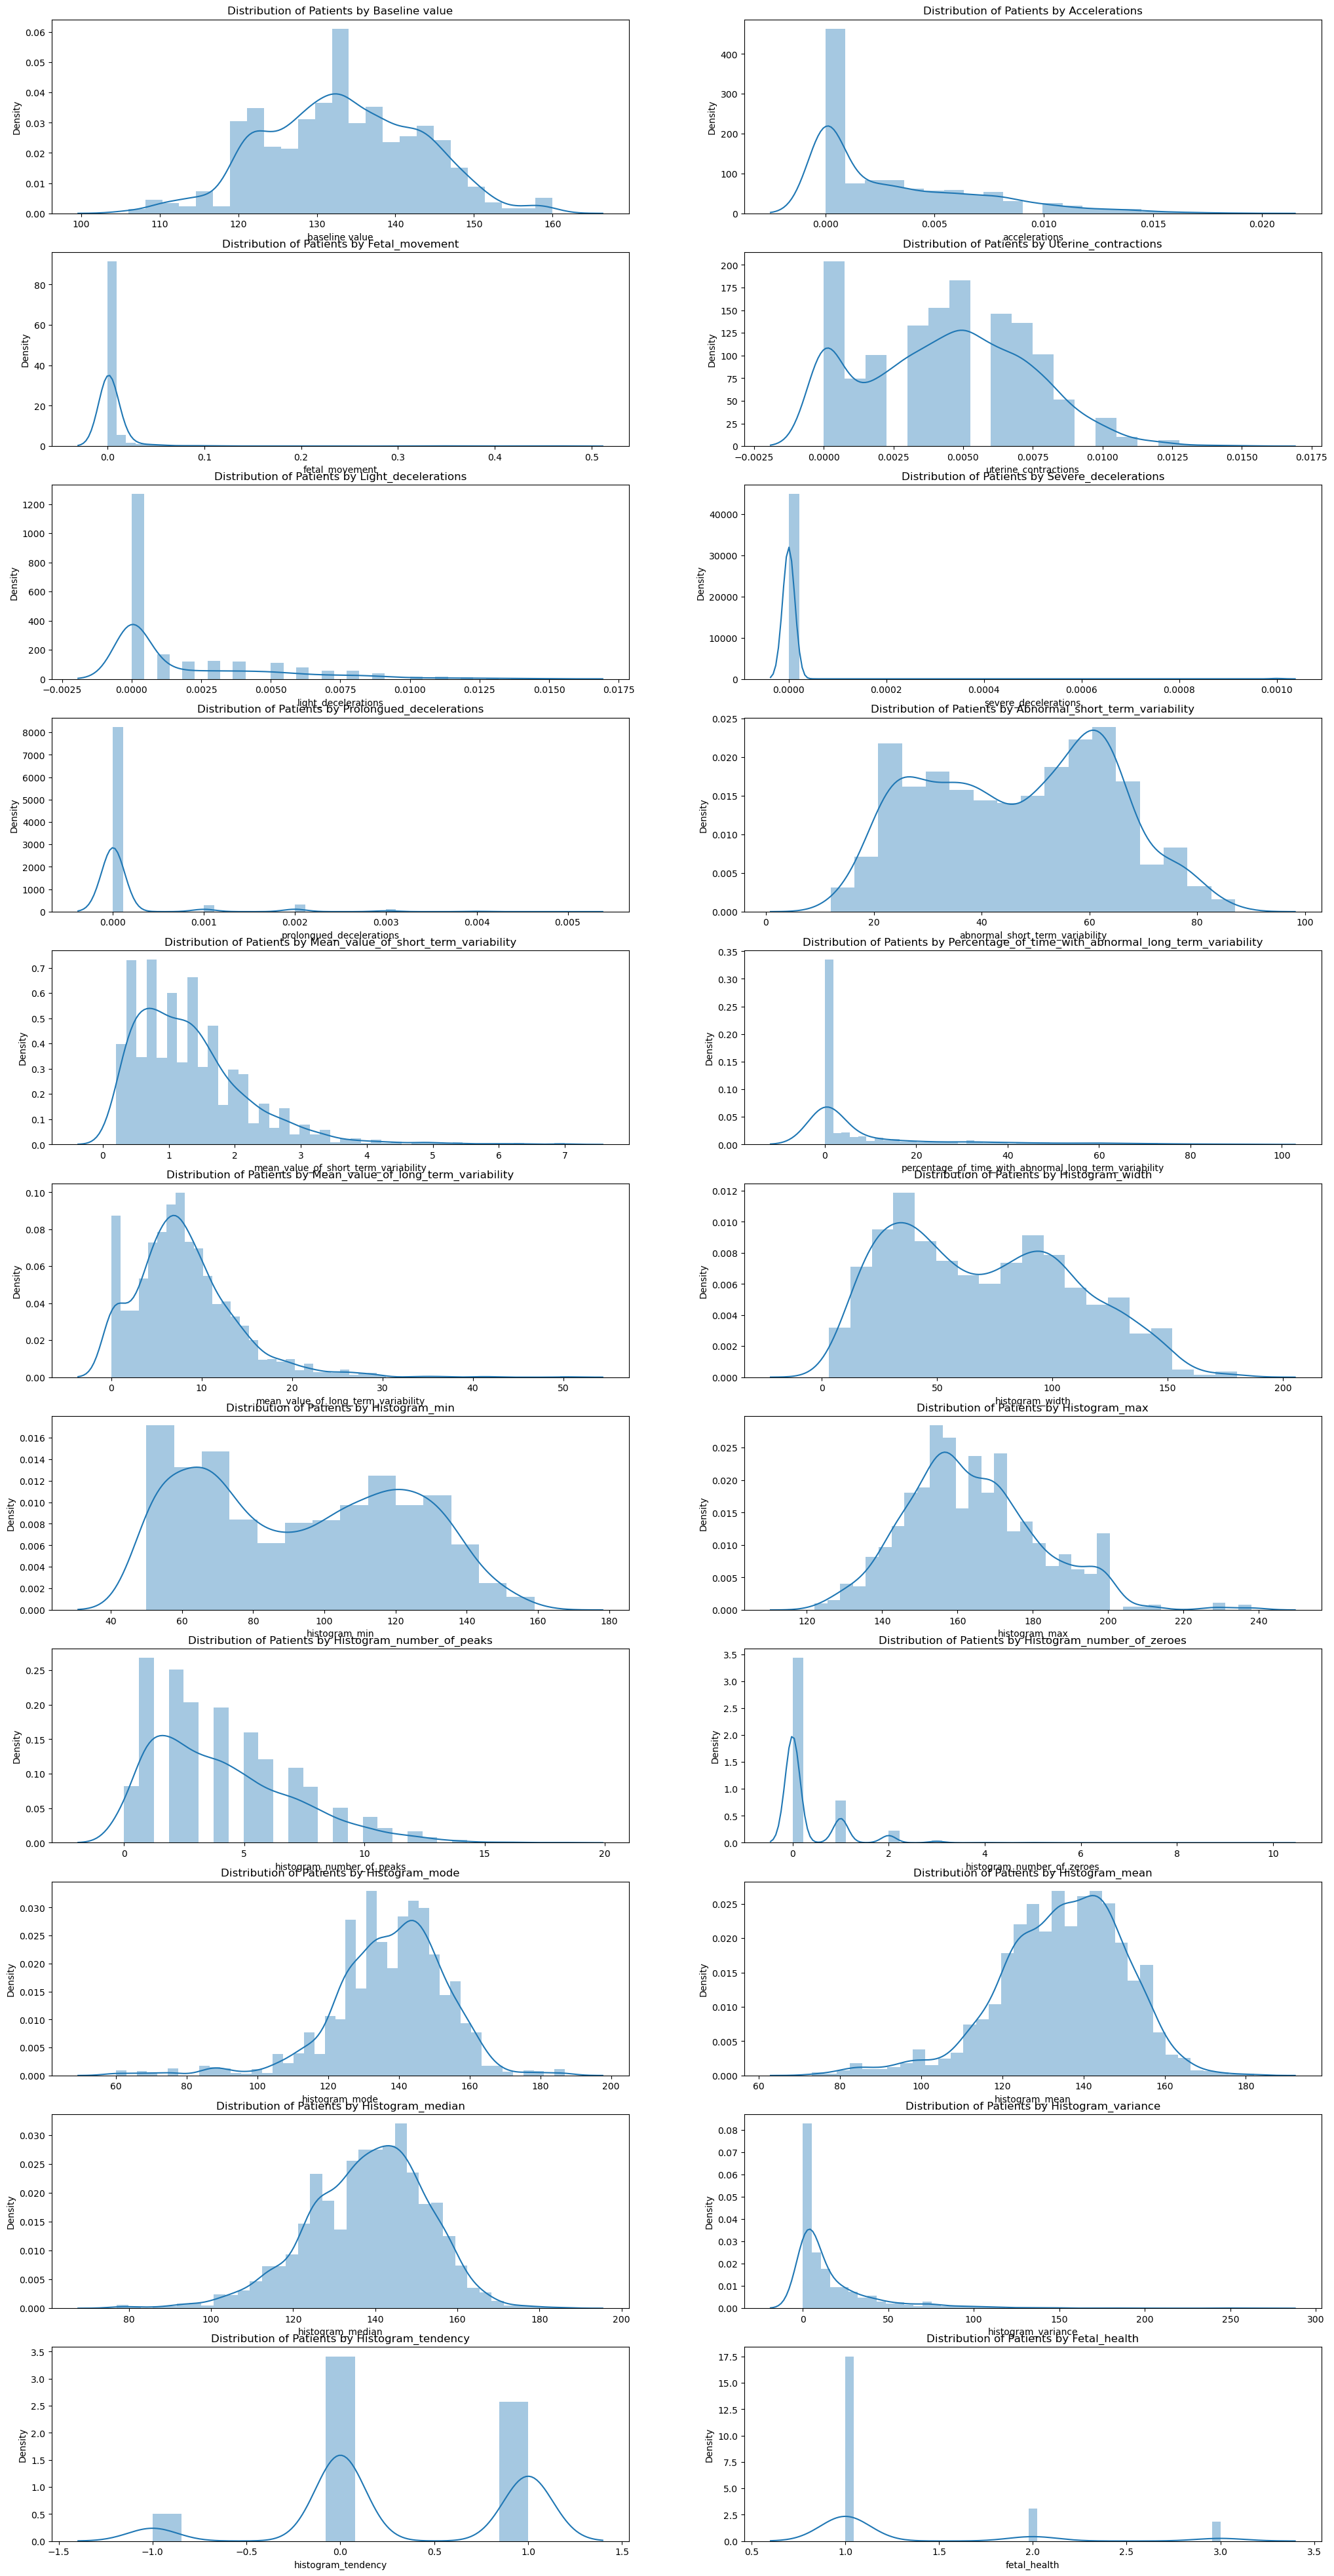

In [8]:
fig, axes = plt.subplots(nrows=round(len(numerical_cols)/2), ncols=2, figsize = (25,50))

# Iterate through each column and plot a countplot
for i, column in enumerate(numerical_cols):
   
    sns.distplot(data[column], ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(f'Distribution of Patients by {column.capitalize()}')
    
    

# Hide any remaining empty subplots
for j in range(len(numerical_cols), len(axes.flat)):
    axes.flatten()[j].axis('off')

In [9]:
fetal_health_df = data.groupby('fetal_health').mean()
fetal_health_df



,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.998177,0.004002,0.008002,0.004801,0.001952,6.075334e-07,0.000052,42.501823,1.431713,5.059538,...,73.492102,91.073512,164.565614,4.170109,0.337181,138.286756,135.116039,138.482382,17.556501,0.341434
2.0,141.650685,0.000277,0.008284,0.002404,0.000541,0.000000e+00,0.000096,61.791096,0.642123,28.832192,...,49.250000,113.304795,162.554795,3.328767,0.246575,146.551370,144.746575,147.061644,7.277397,0.428082
3.0,131.668571,0.000394,0.025823,0.003806,0.003691,3.428571e-05,0.001280,64.554286,1.581714,22.571429,...,78.240000,84.057143,162.297143,4.451429,0.348571,114.445714,112.811429,119.422857,51.017143,-0.080000


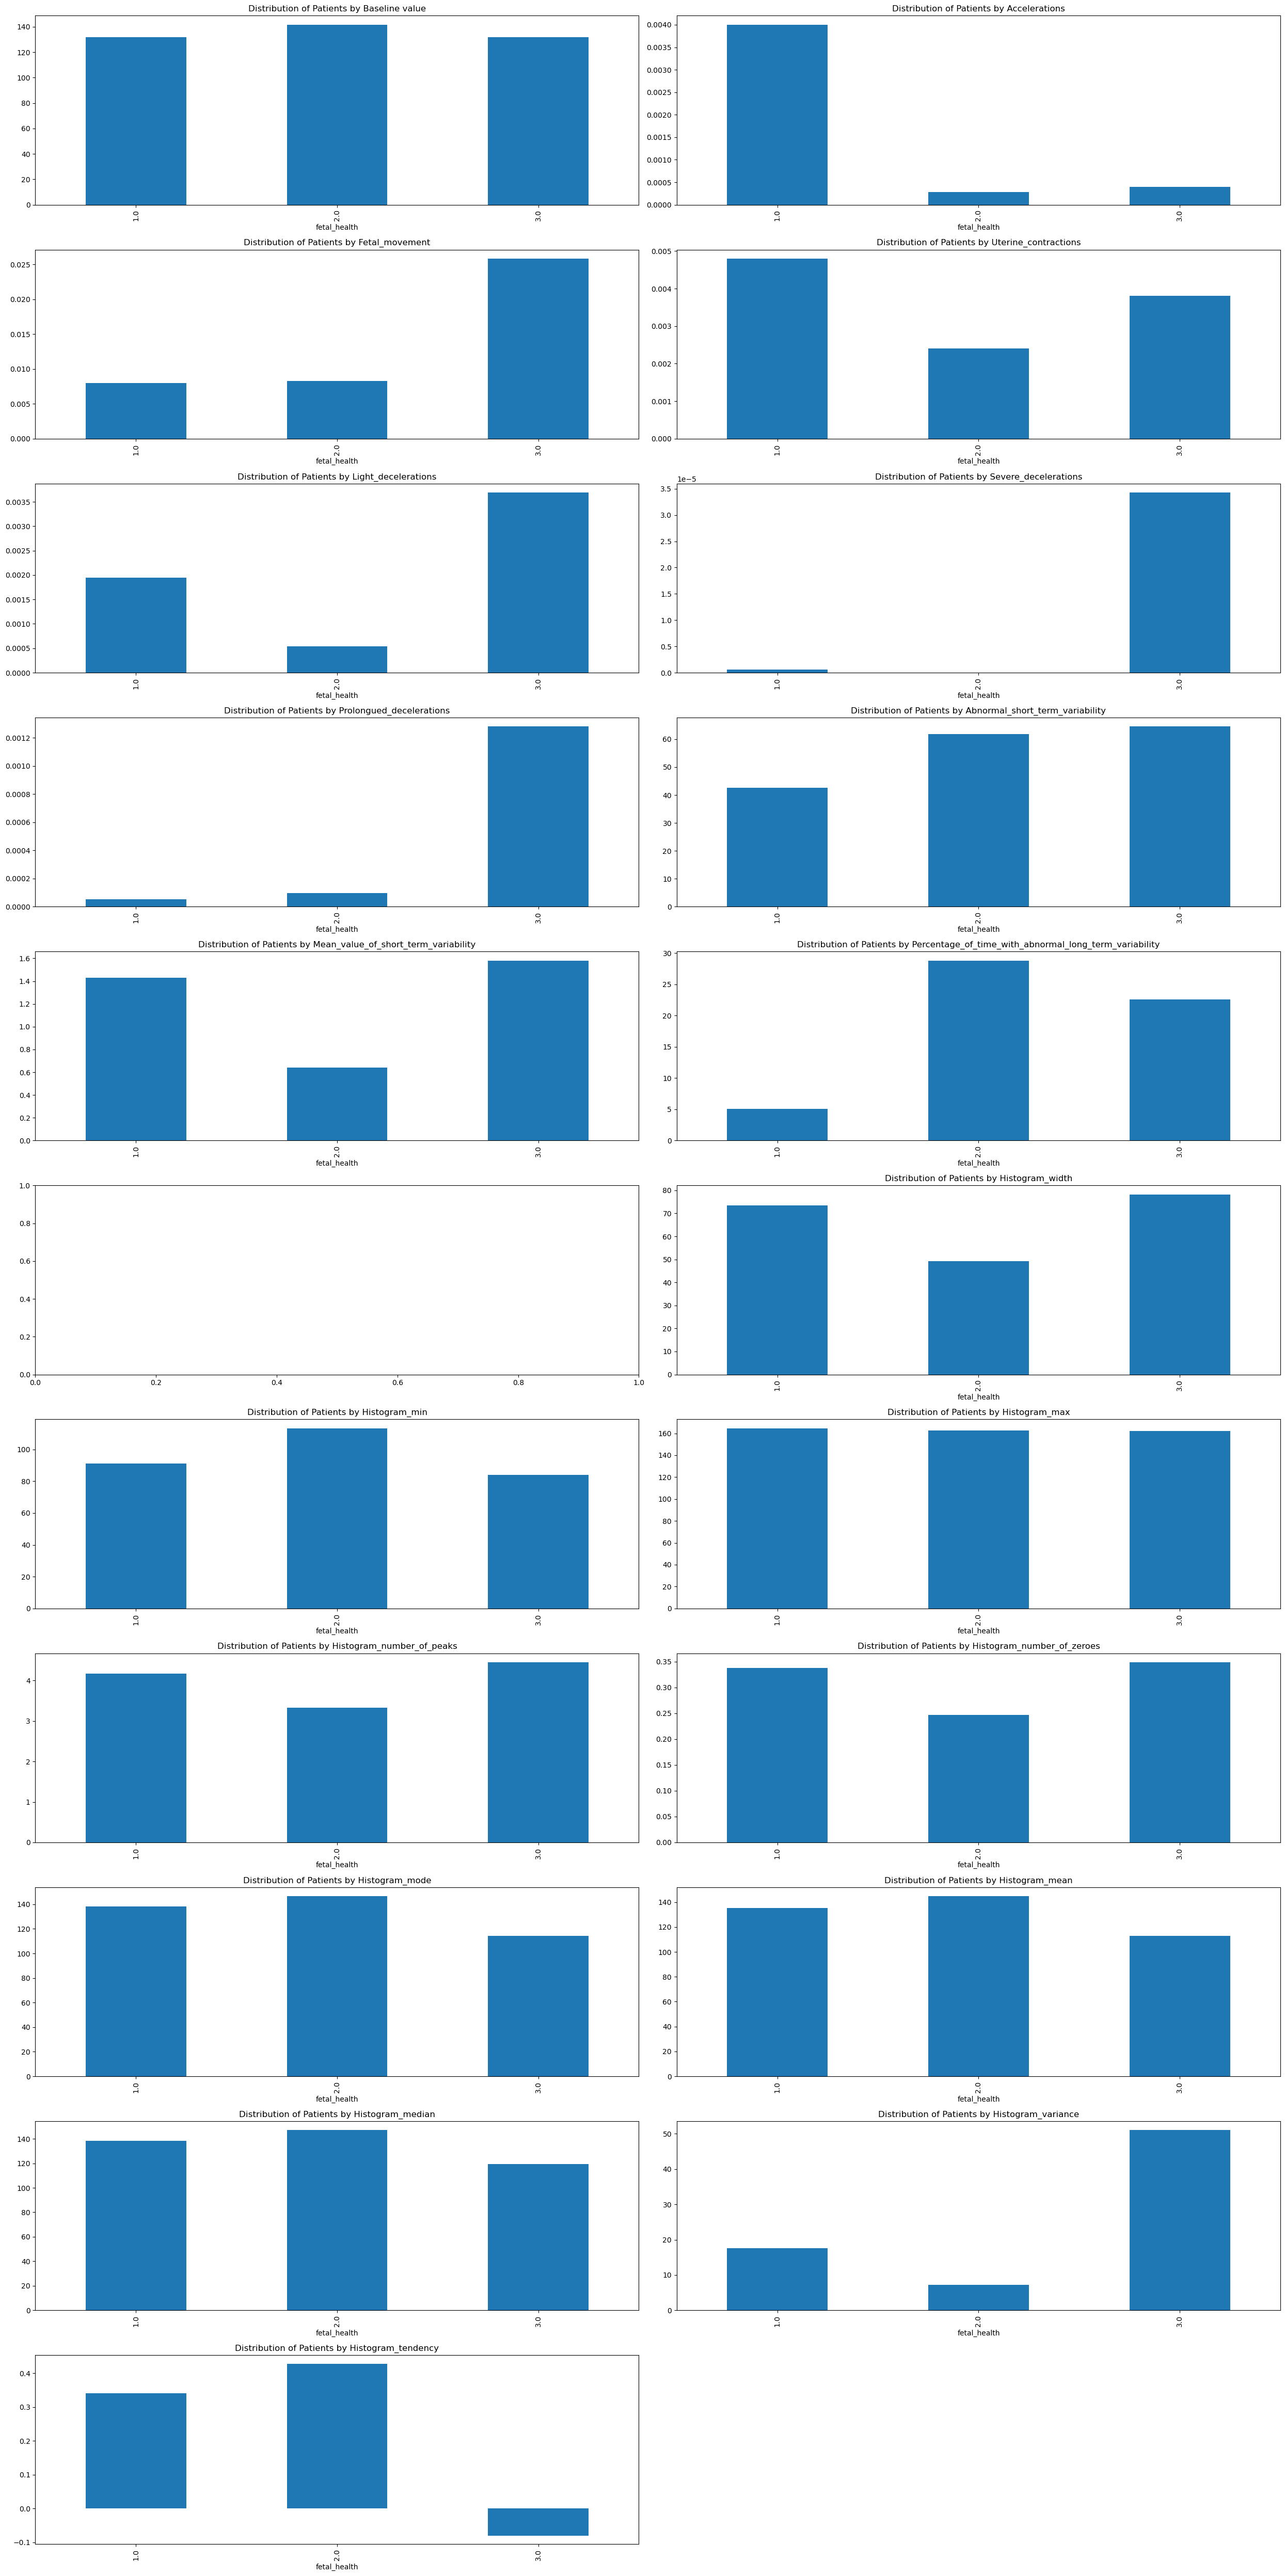

In [10]:
import matplotlib.pyplot as plt

# Create subplots dynamically
nrows = (len(fetal_health_df.columns) + 1) // 2  # Ensure enough rows for all columns
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(25, 50))

# Flatten axes for simpler indexing
axes = axes.flatten()

# Iterate through each column and plot
for i, column in enumerate(fetal_health_df.columns):
    if i == 10:  # Skip column 10
        continue

    # Plot the column
    fetal_health_df[column].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of Patients by {column.capitalize()}')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


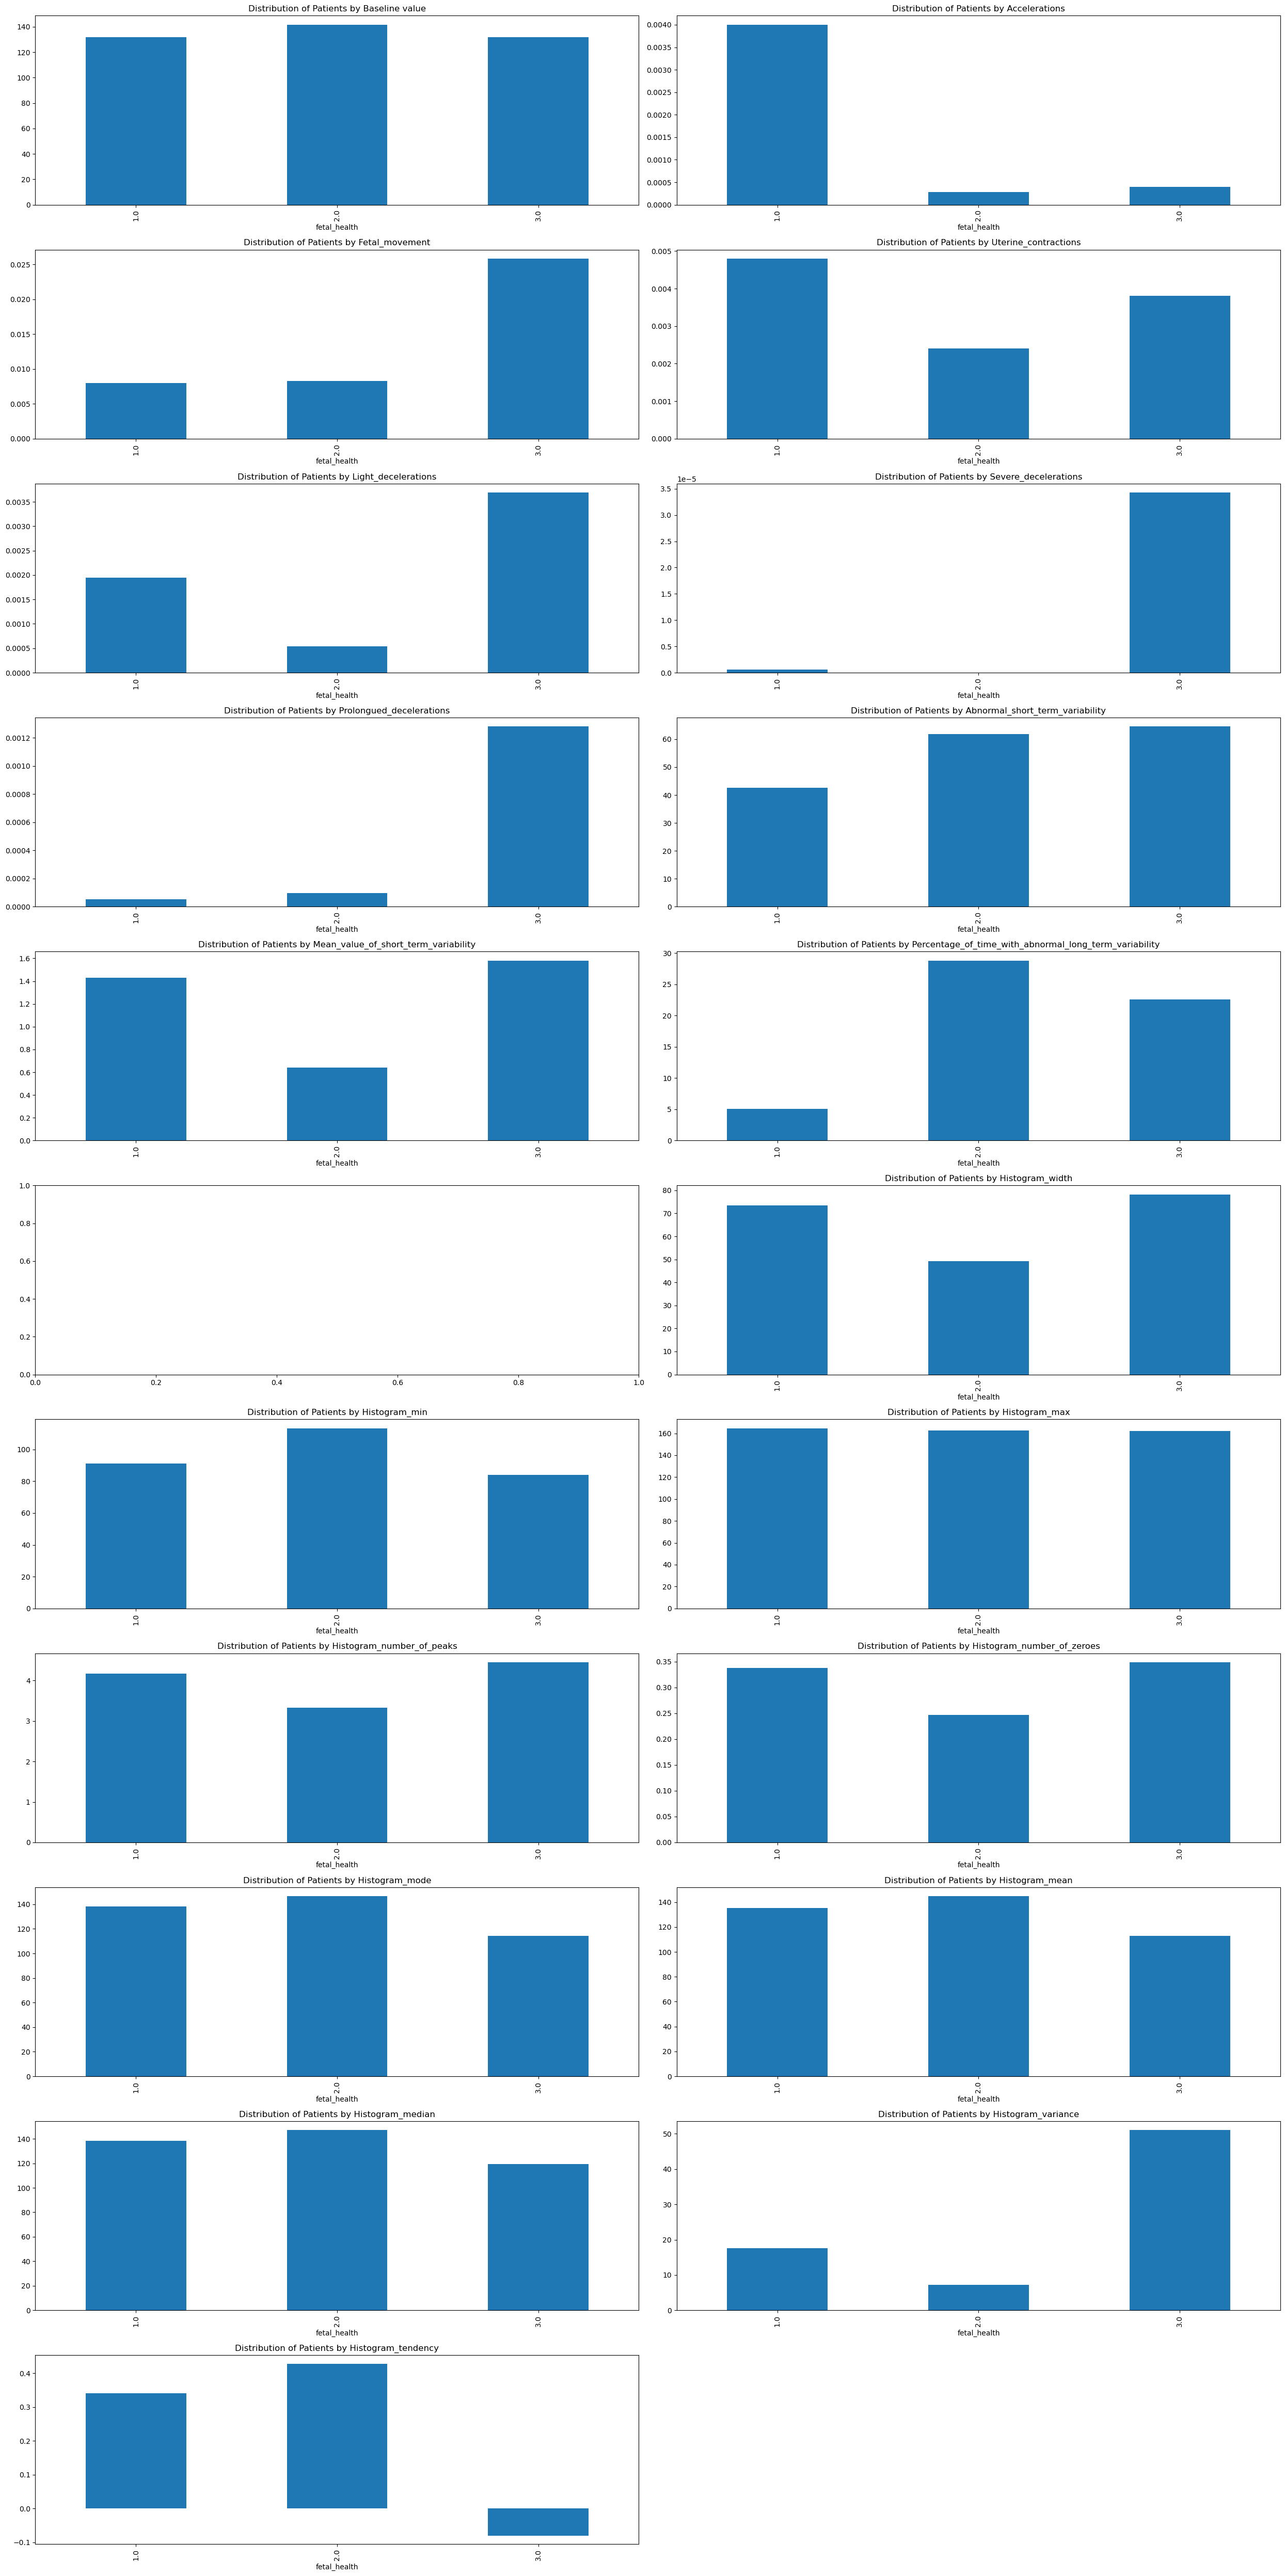

In [11]:
fetal_health_df_median = data.groupby('fetal_health').median()

# Create subplots dynamically
nrows = (len(fetal_health_df_median.columns) + 1) // 2  # Ensure enough rows for all columns
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(25, 50))

# Flatten axes for simpler indexing
axes = axes.flatten()

# Iterate through each column and plot
for i, column in enumerate(fetal_health_df.columns):
    if i == 10:  # Skip column 10
        continue

    # Plot the column
    fetal_health_df[column].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of Patients by {column.capitalize()}')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



# Feature Engineering

## Handling outliers

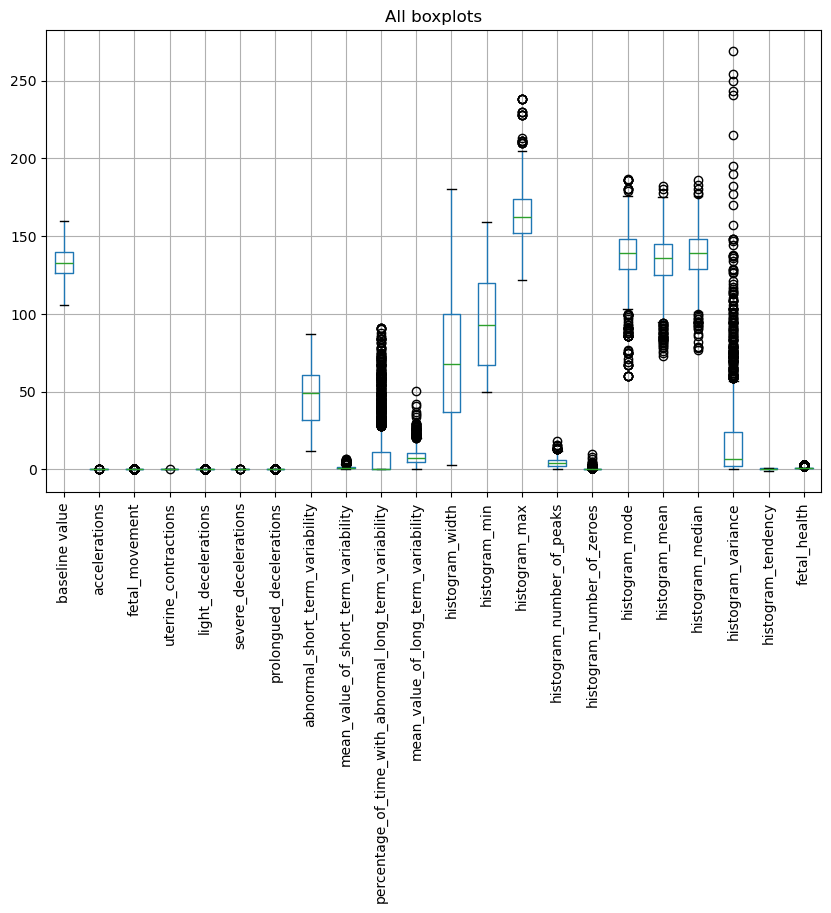

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
data.boxplot()
plt.xticks(rotation=90)
plt.title('All boxplots')
plt.show()

In [13]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_clean = [
    'percentage_of_time_with_abnormal_long_term_variability',
    'mean_value_of_long_term_variability',
    'histogram_variance'
]

data_cleaned = remove_outliers(data, columns_to_clean)

In [14]:
data_cleaned.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [15]:
data_cleaned.dropna(inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 1 to 2124
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1599 non-null   float64
 1   accelerations                                           1599 non-null   float64
 2   fetal_movement                                          1599 non-null   float64
 3   uterine_contractions                                    1599 non-null   float64
 4   light_decelerations                                     1599 non-null   float64
 5   severe_decelerations                                    1599 non-null   float64
 6   prolongued_decelerations                                1599 non-null   float64
 7   abnormal_short_term_variability                         1599 non-null   float64
 8   mean_value_of_short_term_variability       

In [16]:
data_cleaned

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.0,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.0,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.0,0.000,0.0,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1.0
2121,140.0,0.000,0.0,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.0,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.0,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0


## Scaling The data

In [17]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [
    'baseline value',
    'abnormal_short_term_variability',
    'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'mean_value_of_long_term_variability',
    'histogram_mode',
    'histogram_mean',
    'histogram_median',
    'histogram_variance',
    'histogram_min',
    'histogram_max',
    'histogram_number_of_peaks'
    ,'histogram_number_of_zeroes',
    'histogram_width',

]
scaler = StandardScaler()
df_scaled = data_cleaned.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])



In [18]:
df_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,-0.023797,0.006,0.0,0.006,0.003,0.0,0.0,-1.706717,1.051683,-0.535299,...,-0.905099,1.927916,0.680601,1.119492,0.240329,0.085671,0.139084,-0.132562,0.0,1.0
2,0.077943,0.003,0.0,0.008,0.003,0.0,0.0,-1.768498,1.051683,-0.535299,...,-0.905099,1.927916,0.329316,1.119492,0.240329,0.018289,-0.005563,-0.064971,0.0,1.0
4,-0.023797,0.007,0.0,0.008,0.000,0.0,0.0,-1.768498,1.467519,-0.535299,...,-1.453813,0.336562,1.734456,-0.506364,-0.031443,0.085671,-0.005563,-0.200154,1.0,1.0
7,-1.041193,0.000,0.0,0.000,0.000,0.0,0.0,2.370812,-1.166110,0.418044,...,-1.124585,-1.936802,-1.427109,-0.506364,-1.050590,-0.857680,-1.090420,-0.740887,1.0,3.0
8,-1.041193,0.000,0.0,0.002,0.000,0.0,0.0,2.432593,-1.166110,0.259153,...,-1.124585,-1.936802,-1.427109,-0.506364,-1.050590,-0.857680,-1.090420,-0.740887,1.0,3.0


## Handling imbalanced data

<Axes: xlabel='fetal_health'>

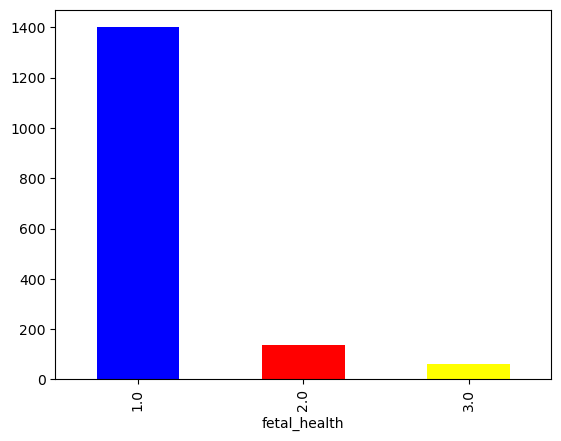

In [19]:
df_scaled['fetal_health'].value_counts().plot(kind = 'bar', color = ['blue', 'red','yellow'])

In [20]:
class_percentage = df_scaled['fetal_health'].value_counts(normalize=True) * 100
print(class_percentage)


fetal_health
1.0    87.554722
2.0     8.567855
3.0     3.877423
Name: proportion, dtype: float64


In [21]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

X, y = smote.fit_resample(df_scaled, df_scaled['fetal_health'])
df_smote = pd.DataFrame(X, columns = df_scaled.columns)
df_smote['fetal_health'] = y


<Axes: xlabel='fetal_health'>

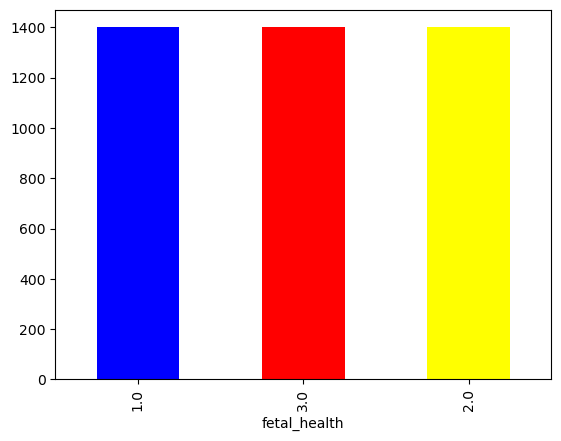

In [22]:
df_smote['fetal_health'].value_counts().plot(kind = 'bar', color = ['blue', 'red','yellow'])


In [23]:
df_smote.shape

(4200, 22)

## Split the data

In [24]:

X = df_smote.drop(['fetal_health'], axis=1)
y = df_smote['fetal_health']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model

## LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)


LogisticRegression()

In [26]:
from sklearn.metrics import confusion_matrix

y_pred2 = LR.predict(X_test)

print("LR Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

LR Confusion Matrix:
[[374  66   4]
 [ 39 370   7]
 [  2   7 391]]


In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred2))

Accuracy: 0.90
              precision    recall  f1-score   support

         1.0       0.90      0.84      0.87       444
         2.0       0.84      0.89      0.86       416
         3.0       0.97      0.98      0.98       400

    accuracy                           0.90      1260
   macro avg       0.90      0.90      0.90      1260
weighted avg       0.90      0.90      0.90      1260



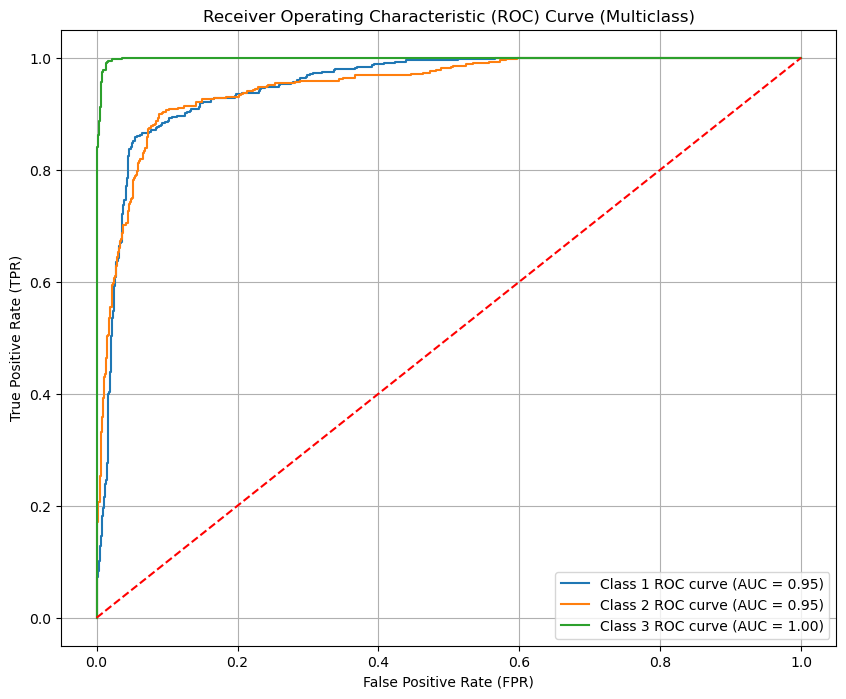

Macro-Averaged AUC: 0.97
Micro-Averaged AUC: 0.97


In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_test_binarized = label_binarize(y_test, classes=[1.0, 2.0, 3.0])
y_score = LR.predict_proba(X_test)

n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} ROC curve (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Multiclass)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

macro_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr", average="macro")
micro_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr", average="micro")

print(f"Macro-Averaged AUC: {macro_auc:.2f}")
print(f"Micro-Averaged AUC: {micro_auc:.2f}")


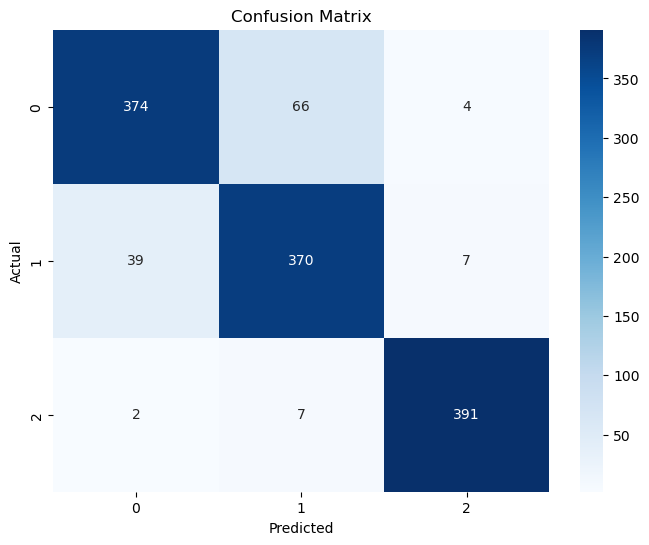

In [30]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

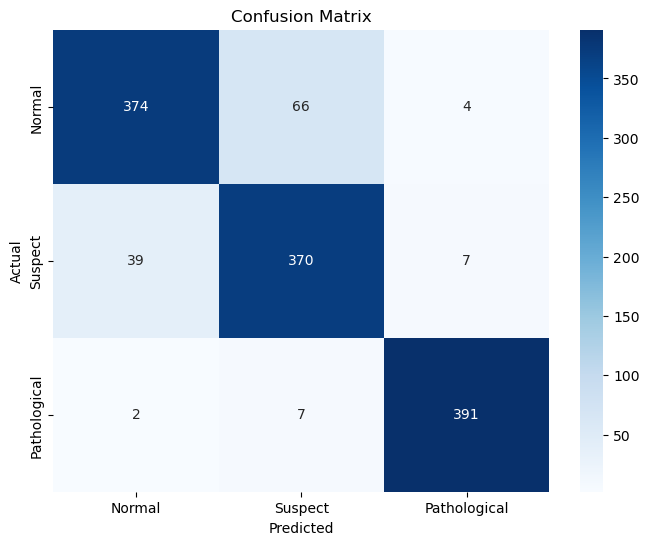

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Example: Define mapping for class labels
class_mapping = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Map y_test and y_pred2 to class labels
y_test_mapped = [class_mapping.get(label, 'Unknown') for label in y_test]
y_pred2_mapped = [class_mapping.get(label, 'Unknown') for label in y_pred2]

# Convert class_mapping values to a sorted list of labels
unique_labels = list(class_mapping.values())

# Compute confusion matrix with mapped labels
cm = confusion_matrix(y_test_mapped, y_pred2_mapped, labels=unique_labels)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=unique_labels,
    yticklabels=unique_labels
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [32]:
import pickle
import numpy as np

# Assume the class labels are [0, 1, 2] and correspond to ['Normal', 'Suspect', 'Pathological']
# You can extract this mapping from your y_train values if needed
class_mapping = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Save the model
with open('task6_model.pkl', 'wb') as file:
    pickle.dump(LR, file)

# Load the model
with open('task6_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
predictions = loaded_model.predict(X_test)

# Map predictions to the corresponding class labels (the original labels)
mapped_predictions = np.vectorize(class_mapping.get)(predictions)

# Display the mapped predictions
print("Mapped Predictions:", mapped_predictions)


Mapped Predictions: ['Suspect' 'Suspect' 'Suspect' ... 'Normal' 'Suspect' 'Normal']


In [33]:


# Class mapping for labels (ensure the keys are unique)
class_mapping = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Load your CSV file into a DataFrame (adjust the file path as necessary)
csv_file_path = 'X_test.csv'  # Replace with your CSV file path
X_test = pd.read_csv(csv_file_path)

# Ensure the features are in the correct format and preprocessed (if required)
# For example, you might need to drop non-feature columns or handle missing values

# Load the saved model
with open('task6_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions using the model
predictions = loaded_model.predict(X_test)  # Pass the test data directly

# Map the predictions to class labels
mapped_predictions = np.vectorize(class_mapping.get)(predictions)

# Display the mapped predictions
print("Mapped Predictions:", mapped_predictions)


Mapped Predictions: ['Suspect' 'Suspect' 'Suspect' ... 'Normal' 'Suspect' 'Normal']
